In [1]:
import numpy as np
import pandas as pd
# import torch
# import scipy
import matplotlib.pyplot as plt
import seaborn

import plotly.graph_objects as go
import plotly.express as px

In [2]:
raw_data = np.loadtxt('Turbine.txt').reshape(-1)
int_cast_data = np.trunc(raw_data*np.power(10,1)).astype(int).reshape(-1, 3)

In [4]:
shifted = (int_cast_data - int_cast_data.min(axis=0) )

sizes = (int_cast_data.max(axis=0) - int_cast_data.min(axis=0) + 50).astype(int)
tensor_3d = np.zeros(sizes, dtype=int)

tensor_3d[shifted[:, 0], shifted[:, 1], shifted[:, 2]] = 1

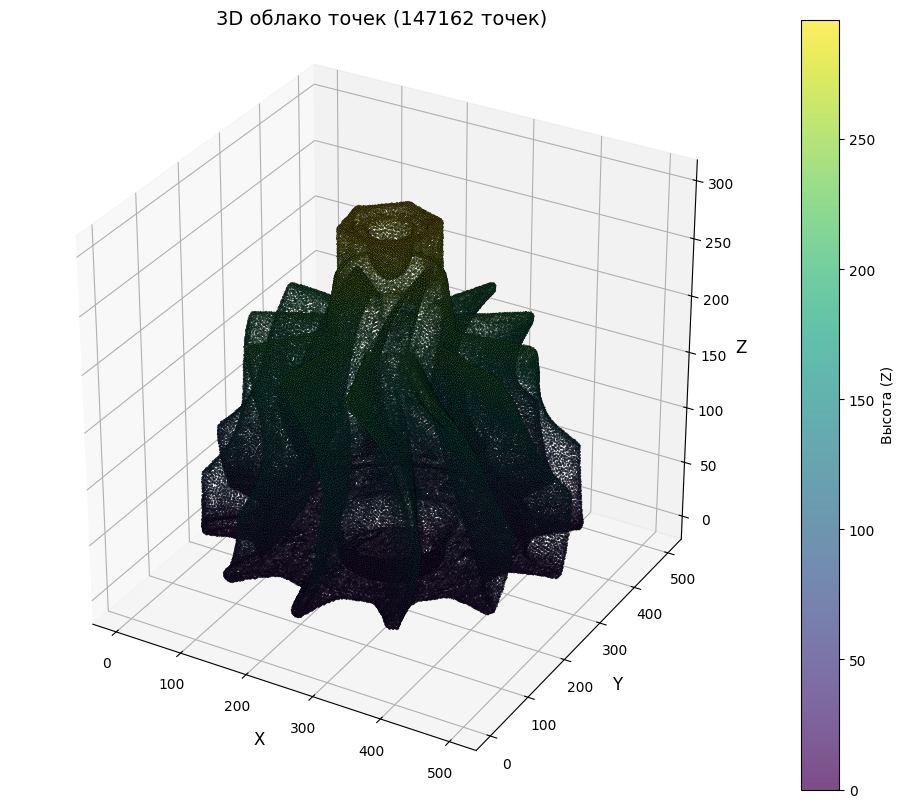

Всего точек: 147162
Размер тензора: (552, 554, 346)
Плотность: 0.001391


In [5]:
points = np.argwhere(tensor_3d != 0)
    

x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, 
                    c=z,
                    cmap='viridis',
                    s=1,         
                    alpha=0.7,
                    edgecolors='k',
                    linewidth=0.5)

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.set_title(f'3D облако точек ({len(points)} точек)', fontsize=14)

plt.colorbar(scatter, ax=ax, label='Высота (Z)')

ax.set_box_aspect([1, 1, 1])

plt.show()

print(f"Всего точек: {len(points)}")
print(f"Размер тензора: {tensor_3d.shape}")
print(f"Плотность: {len(points) / np.prod(tensor_3d.shape):.6f}")

In [ ]:
def make_html_visual(tensor_3d):

    points = np.argwhere(tensor_3d != 0)
        
    title = "Облако точек"
        
    x, y, z = points[:, 0], points[:, 1], points[:, 2]

    colors = z

    fig = go.Figure(data=[go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=4,
            color=colors,
            colorscale='Viridis',
            opacity=0.8,
            colorbar=dict(title="Z")
        ),
        text=[f'({xi}, {yi}, {zi})' for xi, yi, zi in points],
        hovertemplate='<b>Координаты</b>: %{text}<br>' +
                    '<b>Z</b>: %{z}<extra></extra>'
    )])

    fig.update_layout(
        title=dict(text=title, font=dict(size=20)),
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data' 
        ),
        width=1000,
        height=800,
        hovermode='closest'
    )

    # fig.show()

    fig.write_html("3d_cloud.html")

In [89]:
tensor_3d[:,:, 10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
box = np.ones(shape = (9, 9))
box

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [33]:
no_pad = np.array([[1,2], [3,4]])
no_pad

array([[1, 2],
       [3, 4]])

In [36]:
np.pad(no_pad, pad_width=2, mode= 'constant', constant_values=0)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0, 0],
       [0, 0, 3, 4, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [41]:
np.pad(no_pad, pad_width=2, mode= 'constant', constant_values=0).shape

(6, 6)

In [ ]:
def make_conv_2d(source, kernel):

    result = np.zeros(shape = source.shape)

    pad_height = kernel.shape[0] // 2
    pad_width = kernel.shape[1] // 2
    
    source_pad = np.pad(source, 
                        pad_width=((pad_height, pad_height), (pad_width, pad_width)), 
                        mode='constant', 
                        constant_values=0)
    
    # print(source_pad)
                        
    source_pad_height, source_pad_widht = source_pad.shape

    kernel_height, kernel_widht = kernel.shape

    for i in range(source_pad_height - 2*pad_width):
        for j in range(source_pad_widht - 2*pad_width):
            value = min(
                        np.sum(source_pad[i:i + kernel_height, j: j + kernel_widht]*kernel),
                        1
                        )
            
            # value = np.sum(source_pad[i:i + kernel_height, j: j + kernel_widht]*kernel)
            print(i,j, value)
            result[i][j] = value


    return result

tensor_slice = tensor_3d[:,:, 150]

make_conv_2d(source=np.array([[1,2], [3,4]]), kernel=np.ones(shape=(3,3)))


# plt.figure(figsize=(10, 8))
    
# plt.imshow(make_conv_2d(source=np.array([[1,2], [3,4]]), kernel=np.ones(shape=(3,3))), 
#            cmap='viridis', 
#            aspect='auto',
#            origin='lower')  

# plt.colorbar(label='Значение')
# plt.xlabel('X координата')
# plt.ylabel('Y координата')

# plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# plt.tight_layout()
# plt.show()

[[0 0 0 0]
 [0 1 2 0]
 [0 3 4 0]
 [0 0 0 0]]
0 0 10.0
0 1 10.0
1 0 10.0
1 1 10.0


array([[10., 10.],
       [10., 10.]])

In [ ]:
def make_conv_3d(source, kernel):

    result = np.zeros(shape = source.shape)

    pad_height = kernel.shape[0] // 2
    pad_width = kernel.shape[1] // 2
    pad_length = kernel.shape[2] // 2
    
    source_pad = np.pad(source, 
                        pad_width=((pad_height, pad_height), (pad_width, pad_width), (pad_length, pad_length)), 
                        mode='constant', 
                        constant_values=0)
                        

    source_pad_height, source_pad_widht, source_pad_length = source_pad.shape

    kernel_height, kernel_widht, kernel_length = kernel.shape

    for i in range(source_pad_height - 2*pad_height):
        for j in range(source_pad_widht - 2*pad_width):
            for k in range(source_pad_length - 2*pad_length):

                value = min(
                            np.sum(source_pad[i:i + kernel_height, j: j + kernel_widht, k: k + kernel_length]*kernel),
                            1
                            )
                # print(i,j, value)
                result[i][j][k] = value


    return result

tensor_slice = tensor_3d[:,:, 150]


plt.figure(figsize=(10, 8))
    
plt.imshow(make_conv_2d(source=tensor_3d, kernel=np.ones(shape=(15,15,15))), 
           cmap='viridis', 
           aspect='auto',
           origin='lower')  

plt.colorbar(label='Значение')
plt.xlabel('X координата')
plt.ylabel('Y координата')

# plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

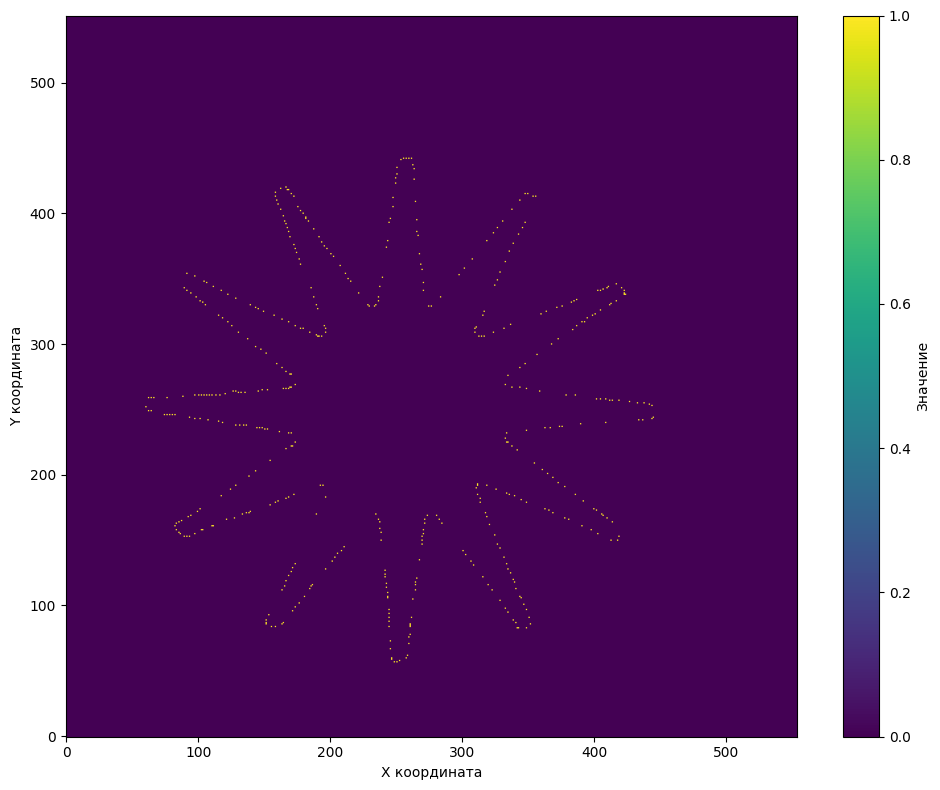

In [68]:
tensor_slice = tensor_3d[:,:, 150]

plt.figure(figsize=(10, 8))
    
plt.imshow(tensor_slice, 
           cmap='viridis', 
           aspect='auto',
           origin='lower')  

plt.colorbar(label='Значение')
plt.xlabel('X координата')
plt.ylabel('Y координата')

# plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()